<h1 align="center"><strong>clustering code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code1: 'K-Mean'**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from IPython.display import clear_output

from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering , DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
players = pd.read_csv("../data/players_22.csv",low_memory=False)
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)
data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


> # **Pseudocode**
> ## **High level**
> 1. Scale data to standardize values
> 2. Initialize random centroids
> 3. Get labels for each data point
> 4. Create new centroids
> 5. Plot the centroids
> 6. Repeat 3-5 until the centroids stop changing
>
> ![alt text](https://i.postimg.cc/d0DmPq5b/image.png)

In [5]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1        # Scale to 1-10
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample().iloc[0]))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,5.695652,4.913043,3.934783,3.543478,3.347826
potential,5.500000,8.434783,4.521739,7.456522,4.717391
wage_eur,1.373391,1.811159,1.605150,1.038627,1.003863
value_eur,1.023939,1.018140,1.045976,1.030898,1.045976
age,3.666667,3.666667,5.000000,4.666667,5.000000


In [7]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels = get_labels(data, centroids)
labels.value_counts()

0    8559
2    5519
4    3369
1    1427
3     291
Name: count, dtype: int64

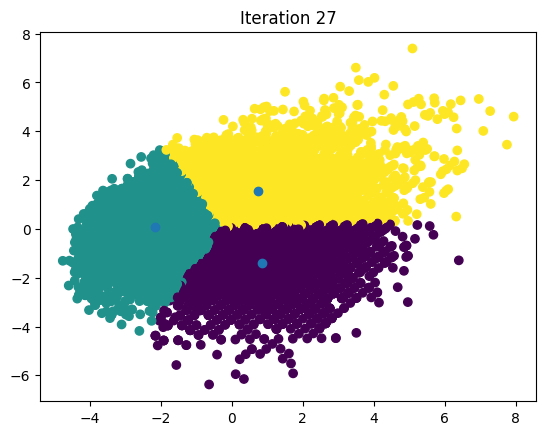

In [8]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

- **Types of Clustering:**
> ![alt text](https://i.postimg.cc/BZ7YXVKc/image.png)

In [9]:
print(f'Converged after {iteration} iterations')
display(centroids)
print(f"Cluster counts: \n{labels.value_counts()}")

Converged after 28 iterations


,0,1,2
overall,4.784633,3.206838,5.806043
potential,4.506962,4.928473,6.497993
wage_eur,1.118904,1.028505,1.420001
value_eur,1.044980,1.026614,1.285501
age,5.472247,2.518708,3.596161


Cluster counts: 
0    7173
1    6223
2    5769
Name: count, dtype: int64


In [10]:
players[labels == 0][["short_name"] + features].sample(10)

,short_name,overall,potential,wage_eur,value_eur,age
13428,J. Clarke,62,62,2000.0,325000.0,29
11404,S. Friðjónsson,64,69,1000.0,850000.0,25
10316,J. Leborgne,65,70,2000.0,1000000.0,25
11429,D. Mendoza,64,64,500.0,130000.0,36
7681,B. Halloran,67,67,2000.0,1000000.0,29
5475,C. Molinaro,69,69,7000.0,300000.0,37
6431,D. Simpson,68,68,12000.0,450000.0,34
13537,D. Ferguson,62,63,2000.0,425000.0,27
12465,O. Threlkeld,63,63,4000.0,475000.0,27
17025,R. Singh,57,57,500.0,140000.0,30


In [11]:
kmeans = KMeans(3)
kmeans.fit(data)

display(kmeans.cluster_centers_)
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

array([[6.20040831, 6.61269401, 1.64576346, 1.40800102, 4.09869455],
       [3.58325134, 5.18887433, 1.03904253, 1.03500408, 2.71468598],
       [4.8147846 , 4.51290419, 1.11507705, 1.04057035, 5.62807018]])

,0,1,2
overall,6.200408,3.583251,4.814785
potential,6.612694,5.188874,4.512904
wage_eur,1.645763,1.039043,1.115077
value_eur,1.408001,1.035004,1.040570
age,4.098695,2.714686,5.628070


<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code2:**

**Clustering (unsupervised learning):** Groups data by similarity.

| **Type**           | **Idea**                                    | **Example**                   |
| ------------------ | ------------------------------------------- | ----------------------------- |
| Connectivity-based | Clusters by distance/connectivity           | Hierarchical                  |
| Centroid-based     | Clusters around centroids                   | K-Means, K-Modes              |
| Distribution-based | Assumes data from probability distributions | Gaussian Mixture Models (GMM) |
| Density-based      | Finds high-density regions                  | DBSCAN                        |

In [12]:
df = pd.read_csv("../data/income.csv",low_memory=False)
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


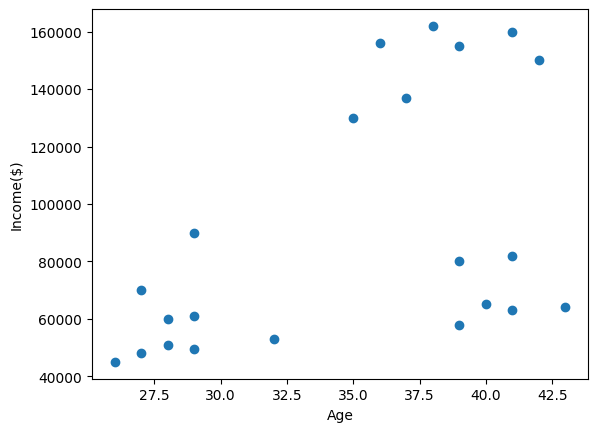

In [13]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


[[32.416666666666664, 57291.66666666667], [38.285714285714285, 150000.0], [36.333333333333336, 84000.0]]


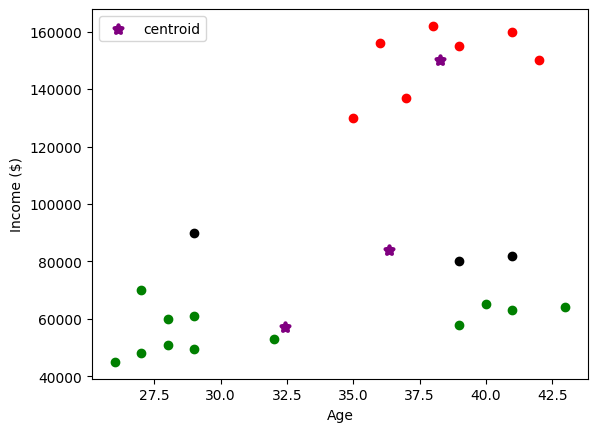

In [15]:
print(km.cluster_centers_.tolist())

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',linewidths=3,label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

<h2 style='color:green'><strong>Preprocessing using min max scaler</strong></h2>

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])

df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


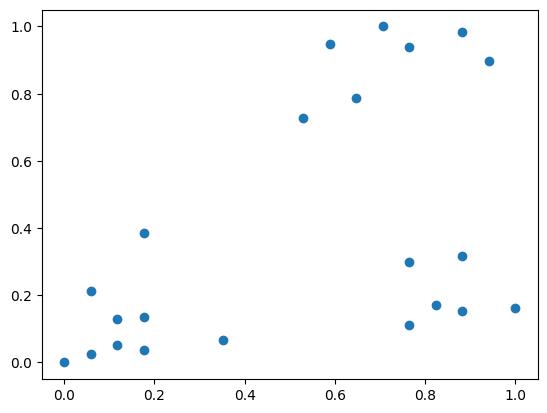

In [17]:
plt.scatter(df.Age,df['Income($)'])
plt.show()

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


[[0.8529411764705882, 0.20227920227920232], [0.13725490196078438, 0.11633428300094972], [0.7226890756302521, 0.8974358974358976]]


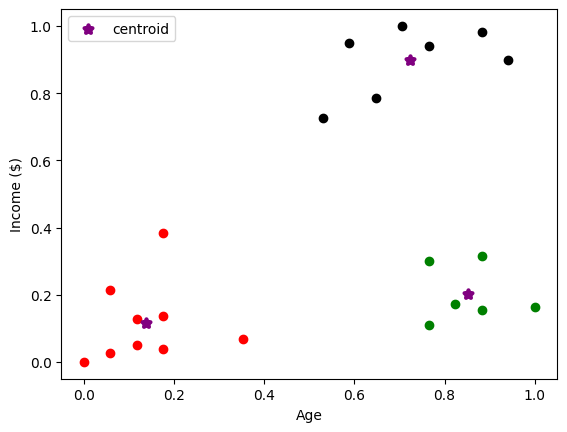

In [19]:
print(km.cluster_centers_.tolist())

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',linewidths=3,label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

<h2 style='color:green'><strong>Elbow Plot</strong></h2>

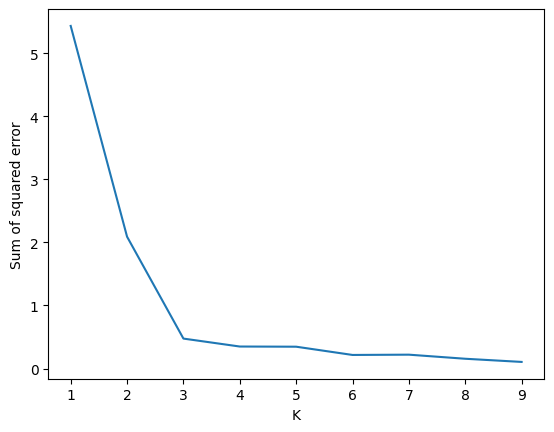

In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

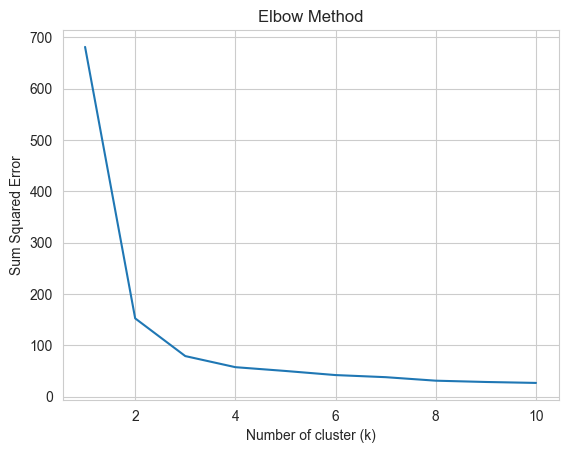

In [21]:
X, y = load_iris(return_X_y=True)

# Find optimum number of cluster
sse = []    # SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')
plt.show()

- From the above graph, we can observe that at k=2 and k=3 elbow-like situation. So, we are considering K=3

[[6.633333333333334, 3.033333333333333, 4.633333333333334, 1.4583333333333333], [5.1, 3.5130434782608697, 1.526086956521739, 0.2739130434782612], [7.720000000000001, 3.1999999999999997, 6.66, 2.12], [5.392307692307693, 2.4384615384615387, 3.6538461538461537, 1.123076923076923], [6.568181818181818, 3.0863636363636364, 5.536363636363637, 2.1636363636363636], [5.8, 2.831818181818182, 4.322727272727272, 1.3409090909090908], [6.036842105263158, 2.705263157894737, 5.0, 1.7789473684210526], [5.5125, 4.0, 1.4749999999999996, 0.275], [4.678947368421053, 3.0842105263157897, 1.3789473684210525, 0.20000000000000007], [7.3, 3.0714285714285716, 6.042857142857143, 2.0]]


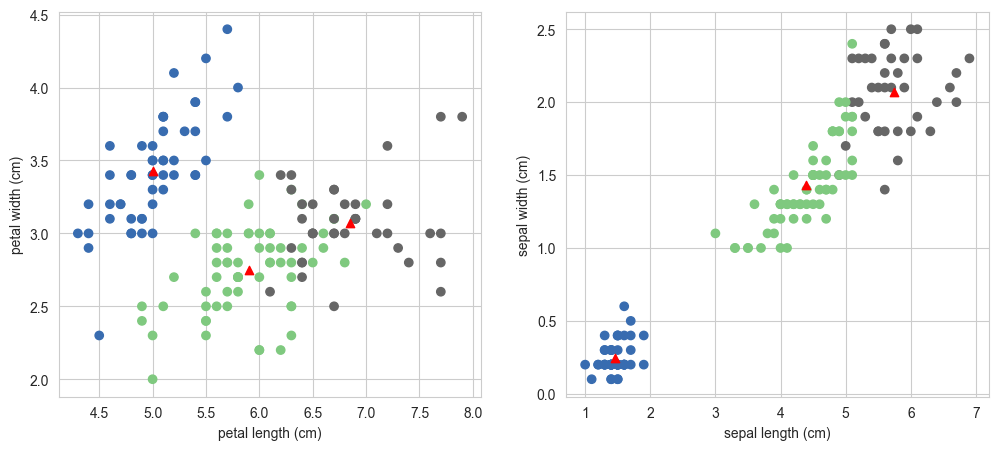

In [22]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)

print(km.cluster_centers_.tolist())

pred = kmeans.fit_predict(X)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.subplot(1,2,2)   
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

1- The subplot on the left display petal length vs. petal width with data points colored by clusters, and red markers indicate K-means cluster centers.         
2- The subplot on the right show sepal length vs. sepal width similarly.

> ### **K-Means Summary:**

* Partitions data into *k* non-overlapping clusters.
* Iteratively updates centroids and assigns points by distance.
* Goal: minimize intra-cluster variance.
* Best for numerical/continuous data.
* Common use: customer segmentation.
* Groups similar points; doesn’t predict labels, just assigns to clusters.

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code3: 'Hierarchical Clustering'**

In [23]:
# randomly chosen dataset 
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]]) 

# here we need to mention the number of clusters 
# otherwise the result will be a single cluster 
# containing all the data 
clustering = AgglomerativeClustering(n_clusters=2).fit(X) 

print(clustering.labels_) 

[1 1 1 0 0 0]


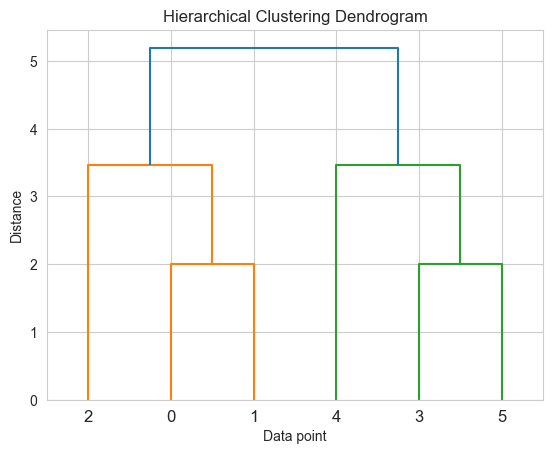

In [24]:
# Perform hierarchical clustering 
Z = linkage(X, 'ward') 

# Plot dendrogram 
dendrogram(Z) 

plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Data point') 
plt.ylabel('Distance') 
plt.show()

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code4: 'DBSCAN'**

In [25]:
data     = load_iris()
X        = data.data
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(X_scaled)

labels = dbscan.labels_
print(len(set(labels)))

8


Estimated number of clusters     : 7
Estimated number of noise points : 17


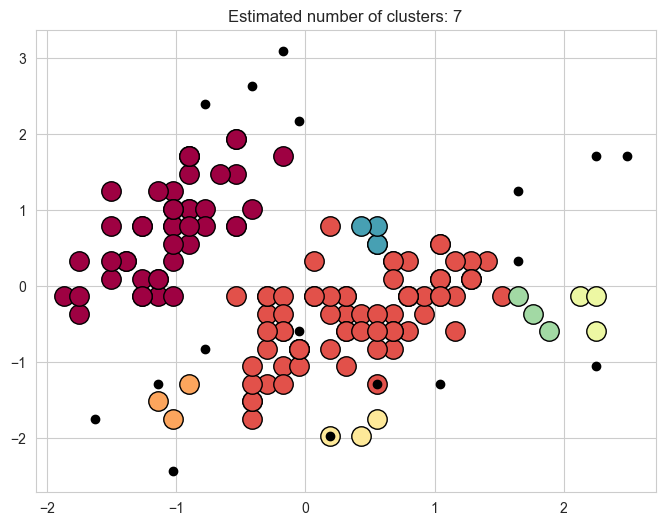

In [26]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_    = list(labels).count(-1)

print(f'Estimated number of clusters     : {n_clusters_}')
print(f'Estimated number of noise points : {n_noise_}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask & (labels != -1)]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    
    xy = X_scaled[class_member_mask & (labels == -1)]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code5:**

In [27]:
data     = load_iris()
X        = data.data
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_
print(f'Labels : {len(set(labels))}')

# Calculate the silhouette score
# Silhouette score is only defined if the number of labels is more than 1 and less than the number of samples
if len(set(labels)) > 1 and len(set(labels)) < len(X):
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {silhouette_avg:.3f}')
else:
    print("Silhouette Score is not defined for the given number of clusters.")

Labels : 3
Silhouette Score: 0.357


Estimated number of clusters     : 2
Estimated number of noise points : 34


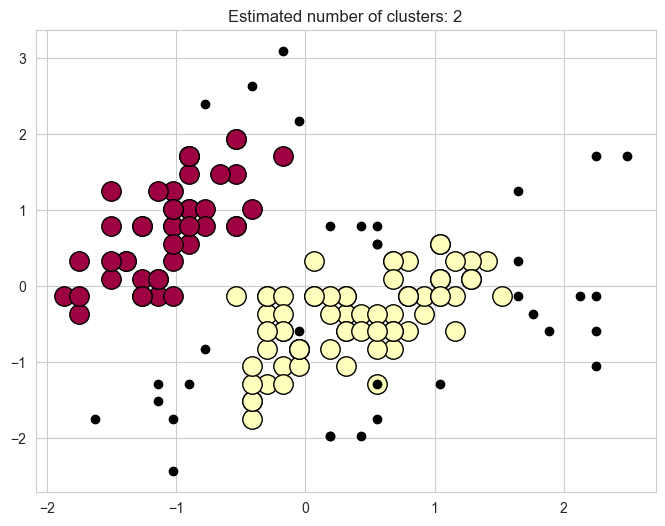

In [28]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_    = list(labels).count(-1)

print(f'Estimated number of clusters     : {n_clusters_}')
print(f'Estimated number of noise points : {n_noise_}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask & (labels != -1)]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    
    xy = X_scaled[class_member_mask & (labels == -1)]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code6: 'GMM'**

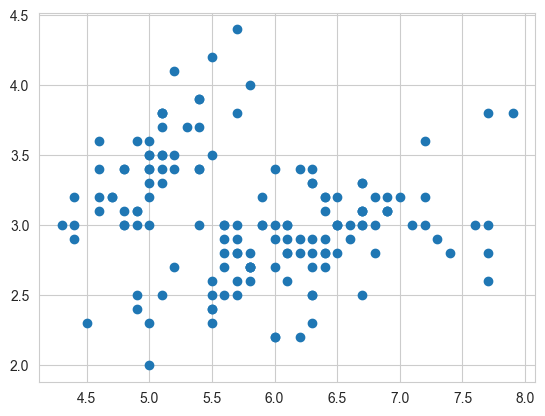

In [29]:
iris = load_iris()
X    = iris.data[:, :2]
d    = pd.DataFrame(X)

plt.scatter(d[0], d[1])
plt.show()

> ### **Gaussian Mixture Model (GMM) Key Parameters**

1. **Number of Components**: Defines how many clusters/distributions the data is divided into.
2. **Covariance Type**: Controls the covariance structure of components, with four options:
   * **Full**: Each component has its own full covariance matrix → unique shape, orientation, size.
   * **Tied**: All components share one covariance matrix → same shape/orientation.
   * **Diag**: Each component has its own diagonal covariance → different variances per dimension, no correlations.
   * **Spherical**: Each component has one variance → spherical shape in all dimensions.

> ![image](https://i.postimg.cc/cH7vSLXP/image.png)

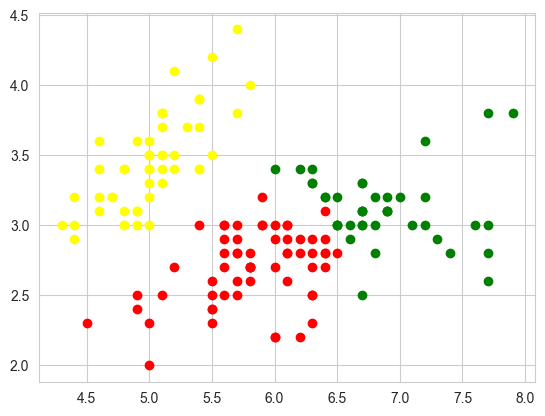

In [30]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(d)      # Fit the GMM model for the dataset which expresses the dataset as a mixture of 3 Gaussian Distribution

# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()

In [31]:
print(f'converged log-likelihood value : {gmm.lower_bound_:.3f}')
print(f'number of iterations needed for the log-likelihood value to converge : {gmm.n_iter_}')

converged log-likelihood value : -1.499
number of iterations needed for the log-likelihood value to converge : 8


- Hence, it needed 7 iterations for the `log-likelihood` to converge. If more iterations are performed, no appreciable change in the log-likelihood value can be observed.

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

# **code7:**

In [32]:
wine = load_wine()
X = wine.data[:, :2]

n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Initialize GMM models for each covariance type
gmm_models = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)for cov_type in covariance_types}

# Fitting the GMM Models و Fit GMM models for each covariance type
for cov_type, gmm_model in gmm_models.items():
    gmm_model.fit(X)

In [33]:
covariances = {cov_type: gmm_model.covariances_ for cov_type, gmm_model in gmm_models.items()}
print(f"covariances: \n{covariances}")
print("-"*50)

# Predict the cluster assignments for all data points
predictions = {cov_type: gmm_model.predict(X) for cov_type, gmm_model in gmm_models.items()}

covariances: 
{'full': array([[[0.65850482, 0.14306183],
        [0.14306183, 0.08963565]],

       [[0.56212312, 0.35649231],
        [0.35649231, 1.20287491]]]), 'tied': array([[0.65472111, 0.06091118],
       [0.06091118, 0.32394795]]), 'diag': array([[0.458586  , 0.86305236],
       [0.77474996, 0.13054888]]), 'spherical': array([0.52650504, 0.51036459])}
--------------------------------------------------


Covariance Matrix (full - Component):
[[0.65850482 0.14306183]
 [0.14306183 0.08963565]]
Covariance Matrix (tied - Component):
[0.65472111 0.06091118]
Covariance Matrix (diag - Component):
[0.458586   0.86305236]
Covariance Matrix (spherical - Component):
0.5265050390881955


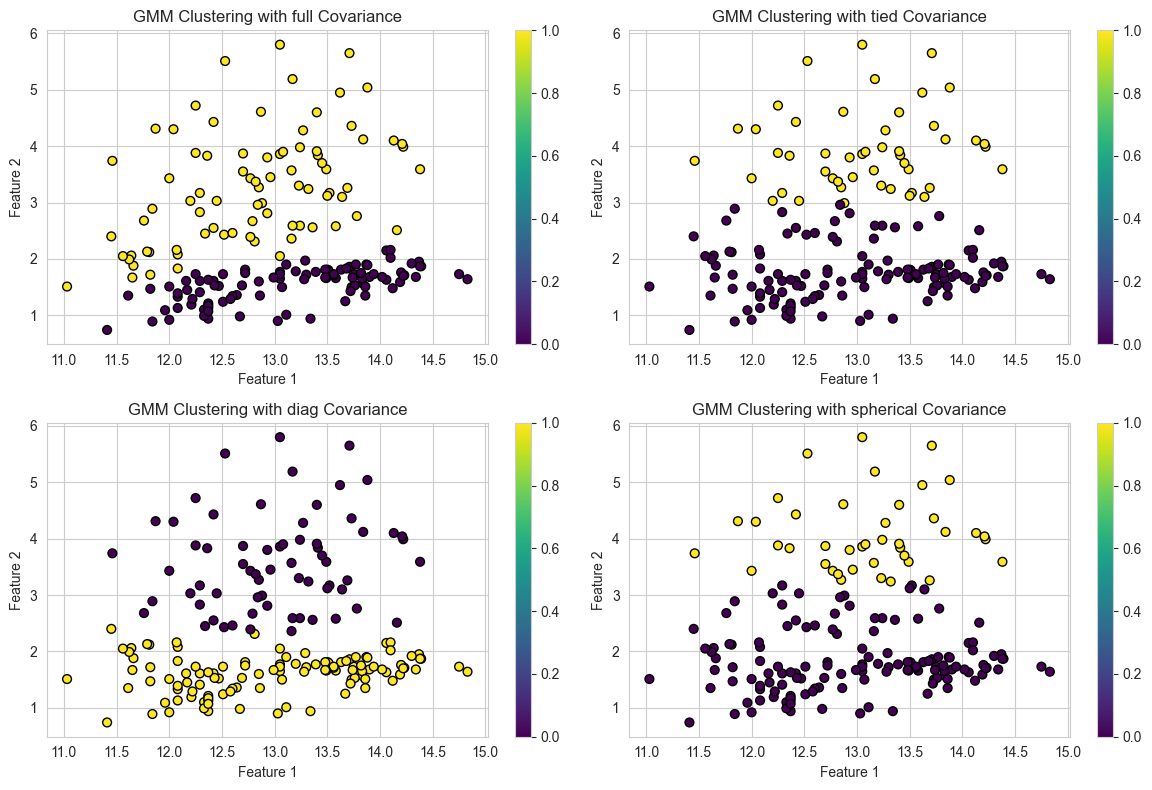

In [34]:
# Plot the clusters for each covariance type
plt.figure(figsize=(12, 8))
for i, (cov_type, gmm_model) in enumerate(gmm_models.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=predictions[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    # Print the covariance matrix for the first component (adjust as needed)
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances[cov_type][0]}')

plt.tight_layout()
plt.show()

In [35]:
for cov_type in ['full', 'tied', 'diag', 'spherical']:
    gmm = GaussianMixture(n_components=2, covariance_type=cov_type, random_state=42)
    gmm.fit(X)
    print(f"{cov_type:<10} BIC: {gmm.bic(X):.3f}")

full       BIC: 906.927
tied       BIC: 951.779
diag       BIC: 924.936
spherical  BIC: 964.869


1- The BIC score is a measure of how well a model fits the data while also penalizing for model complexity.         
2- In general, a `lower BIC score indicates a better model`.